# Chapter 1: Getting started with Image Processing 

### Setting up different Image Processing Libraries in Python

The next few paragraphs describe how to install different image processing libraries and
setup the environment for writing codes to process images using the classical image
processing techniques in python. In the last few chapters of the book, we shall need to use a
different setup when we shall use deep-learning-based methods.


### Installing pip

We are going to use the pip (or pip3) tool to install the libraries, so we need to
install pip first, in case it's not installed. As mentioned here, pip is already installed if we
use python 3 >=3.4 downloaded from python.org or if we are working in a Virtual
Environment created by virtualenv or pyvenv. Just we need to make sure to upgrade pip.
How to install pip for different OS / platforms can be found here.

### Installing Some Image Processing Libraries in Python

In python, there are many libraries which we can use for image processing. Some of the
following libraries we are going to use are as below:

* numpy
* scipy
* scikit-image
* PIL (pillow)
* wand
* opencv-python
* scikit-learn
* mahotas
* matplotlib
* seaborn

The library `matplotlib` and `seaborn` will primarily be used for display purpose, where as
numpy will be used for storing an image. The scikit-learn library will be used for building
machine-learning models for image processing, scipy will be used mainly for image
enhancements. The scikit-image, mahotas and opencv will be used for different image
processing algorithms.

The following code block shows how the libraries that we are going to use can be
downloaded and installed with pip from a python prompt (interactive mode) or in jupyter notebook:

In [1]:
!pip install numpy
!pip install scipy
!pip install scikit-image
!pip install scikit-learn
!pip install matplotlib
!pip install pillow
!pip install mahotas
!pip install opencv-python
!pip install jupyter
!pip install -U wand
!pip install blend_modes
!pip install pillow_lut
!pip install imviz[all]

There may be some additional installation instructions, depending on the OS platform one is going to use. We suggest the reader to go through the documentation sites for each of the
libraries to get a detailed platform-specific installation instructions for each library. For
example, for the scikit-image library, detailed installation instructions for different OS
platforms can be found here. Also, one should be familiar to websites such
as stackoverflow to resolve platform-dependent installation issues for different libraries.

Finally, we can verify whether a library is properly installed or not by importing it from the
python prompt. If the library is imported successfully (no error message is thrown), then
we don't have any installation issue. We can print the version of the library installed by
printing it to the console.

The following code block shows the same for the python library scikit-image.

In [1]:
import skimage
print(skimage.__version__)

0.17.2


As can be seen from above, an example output of the above code block 0.17.2.

The following code-block shows the version of PIL and numpy libraries, respectively, as a `tuple`:

In [2]:
import PIL
import numpy
PIL.__version__, numpy.__version__

('8.3.2', '1.21.6')

Let's ensure that we have the latest versions for all the libraries.

### Installing the Anaconda Distribution

We also recommend to download and install the latest version of the anaconda distribution
from here, this will eliminate the need of explicit installation of many python packages.

More about installing anaconda for different OS can be found '<here>'.
    
### Installing Jupyter Notebook

We are going to use jupyter notebooks to write our python code. So we need to install
the jupyter package first from a python prompt with>>> pip install jupyter
and then launch the jupyter notebook app in the browser using>>> jupyter notebook
where we can create new python notebooks and choose a kernel. If we use anaconda, we do
not need to install jupyter explicitly, the latest anaconda distribution comes with jupyter.

More about running jupyter notebooks can be found here.

We can even install a python package from inside a notebook cell, e.g., we can
install scipy with the command !pip install scipy

For more information on installing Jupyter please
refer: http://jupyter.readthedocs.io/en/latest/install.html    

### Image I/O and Display with Python

The images are stored as files on the disk, so reading and writing images from the files are
disk I/O operations. These can be done using many ways using different libraries, some of
them are shown below. Let's first start by importing all the required packages

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from PIL import Image, ImageFont, ImageDraw, ImageFilter, ImageOps
from PIL.ImageChops import add, subtract, multiply, difference, screen, soft_light, hard_light, overlay, lighter
import PIL.ImageStat as stat
# ! pip install pillow_lut
from pillow_lut import load_cube_file
from skimage import color, exposure, img_as_float, data
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage.transform import SimilarityTransform, PiecewiseAffineTransform, warp, swirl, rescale, resize, downscale_local_mean
from skimage.util import view_as_blocks, invert, random_noise, montage
from skimage import measure
import scipy.ndimage as ndimage
from scipy.ndimage import affine_transform
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from time import time
import os

### Reading/Saving/Displaying an image using PIL

The PIL function `open()` reads an image from disk in an Image object as shown in the code
below. The image is loaded as an object of the class `PIL.PngImagePlugin.PngImageFile` and
we can use the width, height, mode etc. properties to find the size (= width x height in
pixels, i.e., the resolution of the image) and mode of the image.

In [2]:
im = Image.open("images/parrot.png")
#im.save('../new images/parrot.png')
print(im.width, im.height, im.mode, im.format, type(im))
im.show()

453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>


In [ ]:
im_g = im.convert('L')                      # convert the RGB color image to a gray-scale image
im_g.save('images/parrot_gray.png')         # save the image to disk
Image.open("images/parrot_gray.png").show() # read the gray-scale image from disk and show

### Providing the correct path to the images on the disk

We shall recommend to create a folder (sub-directory) to store images to be used for
processing (e.g., for the python code samples, we have used the images stored inside a
folder images) and provide the path to the folder to access the image, to avoid file not found
exception.

In [276]:
import PIL
url = 'https://cdn.pixabay.com/photo/2014/11/30/14/11/cat-551554_640.jpg'
#headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0"}
response = requests.get(url) #, headers=headers)

if response.status_code == 200:
    img = Image.open(BytesIO(response.content))
    img.show()
else:
    print(f"Failed to retrieve image. Status code: {response.status_code}")
    
#Image.open(BytesIO(urlopen(str('https://cdn.pixabay.com/photo/2014/11/30/14/11/cat-551554_640.jpg')).read()))

(328, 240)


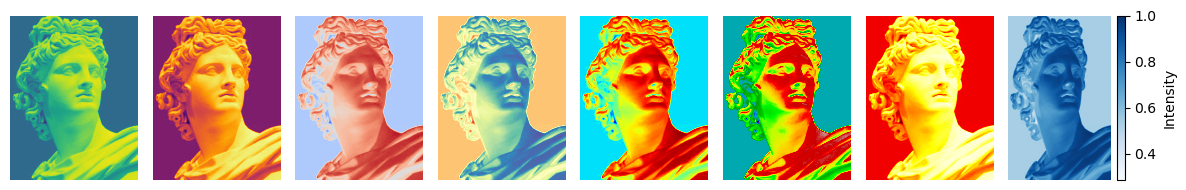

In [25]:
im = plt.imread('images/sculpture.png') 
im_gray = np.mean(im, axis=-1) 
print(im_gray.shape) 
#(256, 256) 
i = 1 
plt.figure(figsize=(12,2)) 
for cmap in ['viridis', 'inferno', 'coolwarm', 'Spectral', 'jet', \
             'nipy_spectral', 'hot', 'Blues']: 
    plt.subplot(1,8,i), plt.imshow(im_gray, cmap=cmap, aspect='auto')  
    plt.axis('off') 
    i += 1 
plt.colorbar(label='Intensity') 
plt.tight_layout() 
plt.show() 

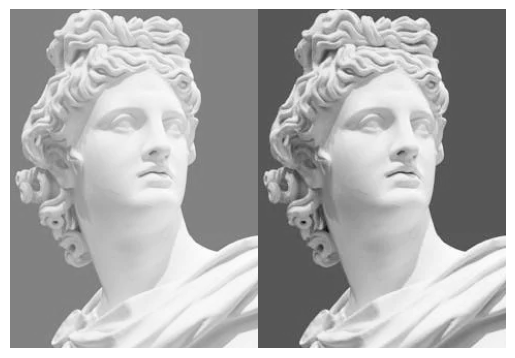

In [26]:
im_gray_avg = np.mean(im, axis=-1) 
im_gray_ntsc =  0.299 * im[...,0] + 0.587 * im[...,1] + 0.114 * im[...,2]
plt.imshow(np.hstack((im_gray_avg, im_gray_ntsc))), plt.axis('off');

In [ ]:
from skimage import img_as_float, img_as_ubyte

im_float = img_as_float(im)    # Converts safely to float [0, 1]
im_uint8 = img_as_ubyte(im_float)  # Converts safely back to uint8

### Reading/Saving/Displaying an image using Matpotlib

### with matplotlib.image

The next code block shows how to use the function `imread()` from `matplotlib.image` to read an image in a floating-point numpy ndarray. The pixel values will be represented as real values between 0 and 1. The following figure shows the output of the above code.

In [7]:
im = mpimg.imread("images/hill.png")  # read the image from disk as a numpy ndarray
print(im.shape, im.dtype, type(im))      # this image contains an α channel, hence num_channels = 4

(960, 1280, 3) float32 <class 'numpy.ndarray'>


The next code fragment changes the image to a darker image by first setting all the pixel values below 0.5 to 0
and then saving the `numpy` ndarray to disk. The saved image is again reloaded and displayed. The next figure shows the darker image saved with the above code. Note that we have used the `imsave()` function from `matplotlib.image` module to save the darkened image to disk.

In [ ]:
im_dark = im.copy() 
print(np.max(im))
im_dark[im_dark < 0.5] = 0    # make the image look darker
mpimg.imsave("images/hill_dark.png", im_dark)  # save the dark image

im_dark = mpimg.imread("images/hill_dark.png")[...,:3] # read the dark image, first 3 color channels
plt.figure(figsize=(12,5))
plt.imshow(np.hstack((im, im_dark))), plt.axis('off'), plt.title('original and the darkened image', size=20)
plt.tight_layout()
plt.show()

You could use the `savefig()` function from `matplotlib.pylab` too to save an image to the disk, but you need to plot it using the `imshow()` function before saving.

### Interpolating while displaying with matplotlib imshow

The `imshow()` function from matplotlib provides many different types of interpolation
methods to plot an image. These functions can be particularly useful when the image to be
plotted is small. Let us use the small 50 x 50 lena image shown in the next figure to see the
effects of plotting with different interpolation methods. The next code block demonstrates how to use different interpolation methods with `imshow()`. The next figure shows the output of the above code. The next figure shows the output of the above code.

In [ ]:
im = mpimg.imread("images/monalisa.jpg") # read the image from disk as a numpy ndarray
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.01, wspace=0.01)
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(im, interpolation=interp_method)
    ax.set_title(str(interp_method))
#plt.tight_layout()
plt.show()

### Reading/Saving/Displaying an image using scikit-image

The next code block uses the `imread()` function from `scikit-image` to read an image in a numpy
ndarray of type uint8 (8bit unsigned integer). Hence, the pixel values will be in between 0 to
255. Then it converts (changes the image type or mode which will be discussed shortly) the
colored RGB image to an HSV image using the function `hsv2rgb()` from the Image.color
module. Next it changes the saturation (colorfulness) to a constant value for all the pixels
by keeping the hue and value channels unchanged. The image is then converted back to
RGB mode with 1rgb2hsv()` function to create a new image, which is then saved and
displayed. The next figure shows the output of the above code, the new image with changed
saturation.

In [6]:
def min_max_normalize(im, low=0, high=255):
    """Normalizes the pixel values of the image im to the specified"""
    """[low, high] range using min-max scaling."""
    return ((high-low)*(im-im.min())/(im.max()-im.min())).astype(np.uint8)

(340, 453, 3) uint8 <class 'numpy.ndarray'> 255 0
(340, 453) float64 0.9966290196078432 0.008944313725490196
(340, 453, 3) 255 0
uint8


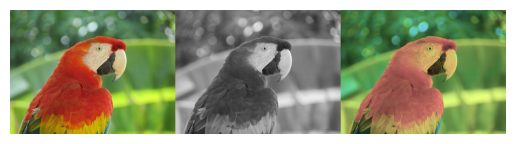

In [5]:
im = imread("images/parrot.png")  # read mage, provide the correct path 
print(im.shape, im.dtype, type(im), im.max(), im.min())  
# (362, 486, 3) uint8 <class 'numpy.ndarray'> 
im_gray = imread("images/parrot.png", as_gray=True) # read grayscale image 
print(im_gray.shape, im_gray.dtype, im_gray.max(), im_gray.min()) 
#(340, 453, 3) uint8 <class 'numpy.ndarray'> 255 0 
 
im_gray = min_max_normalize(im_gray) 
im_gray = color.gray2rgb(im_gray) 
print(im_gray.shape, im_gray.max(), im_gray.min()) 
#(340, 453) float64 0.9966290196078431 0.008944313725490196 
 
hsv = color.rgb2hsv(im) # from RGB to HSV color space 
hsv[:, :, 1] = 0.5 # change the saturation 
im_hsv = min_max_normalize(color.hsv2rgb(hsv)) # from HSV back to RGB 
print(im_hsv.dtype) 
# uint8 
imsave('images/parrot_hsv.png', im_hsv) # save image to disk 
 
im_hsv = imread("images/parrot_hsv.png") 
plt.imshow(np.hstack((im, im_gray, im_hsv))), plt.axis('off') 
plt.show() 

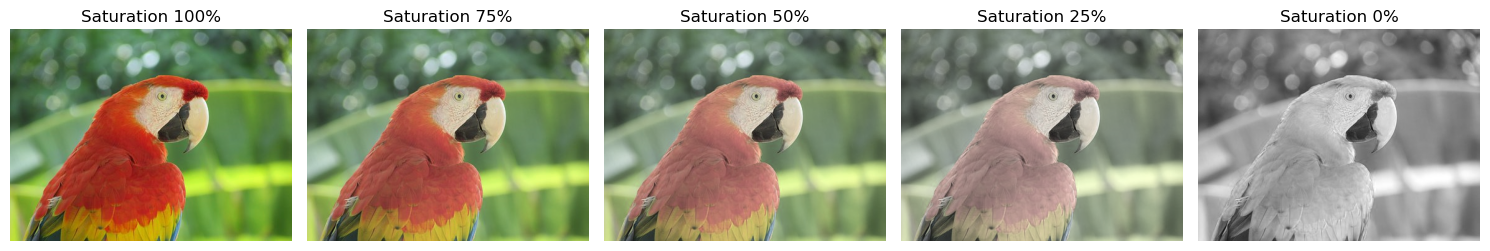

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image (in BGR)
image = cv2.imread('images/parrot.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Create images with different saturation levels
saturation_factors = [1.0, 0.75, 0.5, 0.25, 0.0]
muted_images = []

for factor in saturation_factors:
    hsv_copy = hsv.copy()
    hsv_copy[..., 1] = (hsv_copy[..., 1] * factor).astype(np.uint8)
    muted_bgr = cv2.cvtColor(hsv_copy, cv2.COLOR_HSV2BGR)
    muted_rgb = cv2.cvtColor(muted_bgr, cv2.COLOR_BGR2RGB)
    muted_images.append(muted_rgb)

# Plot the images
titles = [f"Saturation {int(f*100)}%" for f in saturation_factors]

plt.figure(figsize=(15, 4))
for i, (img, title) in enumerate(zip(muted_images, titles)):
    plt.subplot(1, len(muted_images), i + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()

### Using scikit-image's astronaut dataset

The following code block shows how we can load the astronaut image from the scikit-image
library's image datasets, with the data module. The module contains few other popular
datasets, such as cameraman, they can similarly be loaded. The next figure shows the output of the above code.

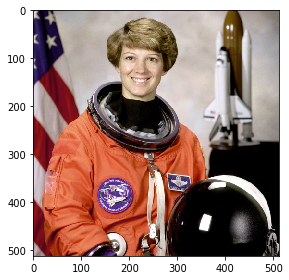

In [26]:
im = data.astronaut()
plt.imshow(im)
plt.show()

### Reading and displaying multiple images at once

We can use scikit-image io module's imread_collection() function to load all images in a
folder having a particular pattern in the file name and display them simultaneously with
the imshow_collection() function. The next code block shows an example of reading an
showing an image collection. The next figure shows the output of the above code block.

In [ ]:
images = imread_collection('images/image_dir/*.jpg')
print(len(images)) # print number of jpg images in the folder, there were 4 of them
# 4
imshow_collection(images, aspect='auto')
plt.show()

In [ ]:
import cv2 
image = cv2.imread('images/model.png') 
image_gray = cv2.imread('images/model.png', cv2.IMREAD_GRAYSCALE) 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(np.hstack((image, image_rgb,  
           np.repeat(image_gray[..., np.newaxis], 3, axis=-1)))), plt.axis('off') 
plt.title('image before and after BGR to RGB color conversion and the grayscale image', size=10) 
plt.show() 

In [282]:
cv2.imwrite('images/model_yuv.png', cv2.cvtColor(image_rgb,     
                                    cv2.COLOR_RGB2YUV)) 

True

### Block views on images

This example illustrates the use of view_as_blocks from skimage.util(). Block views can be incredibly useful when one wants to perform local operations on non-overlapping image patches.

Let's virtually ‘slice’ the grayscale input image into square blocks. Then, on each block, we either pool the mean, the max or the median value of that block. The results are displayed altogetherthe original image.

3


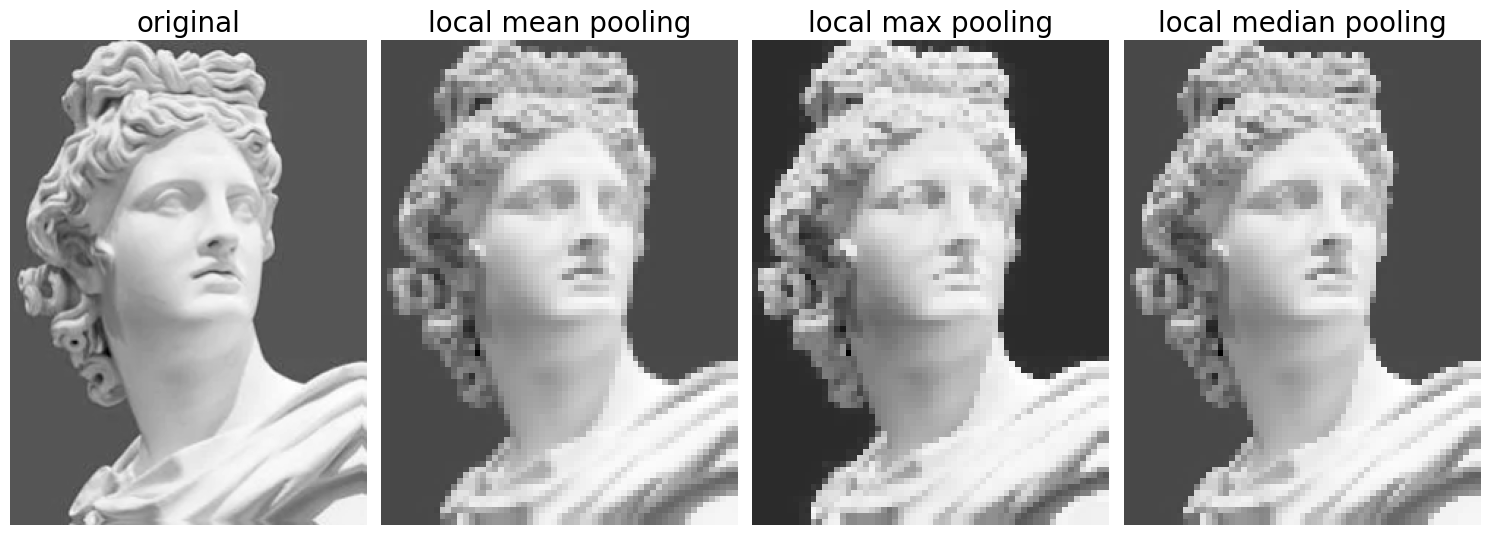

In [17]:
# get astronaut from skimage.data in grayscale
im = color.rgb2gray(imread('images/sculpture.png')[...,:3])

# size of blocks
block_shape = (4, 4) #(8, 8)

# Ensure image dimensions are divisible by block size
pad_height = (block_shape[0] - im.shape[0] % block_shape[0]) % block_shape[0]
pad_width = (block_shape[1] - im.shape[1] % block_shape[1]) % block_shape[1]

if pad_height != 0 or pad_width != 0:
    # Optional: Pad the image to make it divisible by block size
    im = np.pad(im, ((0, pad_height), (0, pad_width)), mode='reflect')


# see astronaut as a matrix of blocks (of shape block_shape)
view = view_as_blocks(im, block_shape)

# collapse the last two dimensions in one
flatten_view = view.reshape(view.shape[0], view.shape[1], -1)

# resampling the image by taking either the `mean`,
# the `max` or the `median` value of each blocks.
mean_view = np.mean(flatten_view, axis=2)
max_view = np.max(flatten_view, axis=2)
median_view = np.median(flatten_view, axis=2)

plt.figure(figsize=(15,7))
plt.gray()
plt.subplot(141), plt.axis('off'), plt.title('original', size=20), plt.imshow(im)
plt.subplot(142), plt.axis('off'), plt.title('local mean pooling', size=20), plt.imshow(mean_view)
plt.subplot(143), plt.axis('off'), plt.title('local max pooling', size=20), plt.imshow(max_view)
plt.subplot(144), plt.axis('off'), plt.title('local median pooling', size=20), plt.imshow(median_view)
plt.tight_layout()
plt.show()

## Reading/Saving/Displaying an image using opencv-python

In [ ]:
import cv2
image = cv2.imread('images/model.png')
cv2.imshow('Model', image)
cv2.waitKey(0) 
print(image.dtype)
# uint8

In [ ]:
image_gray = cv2.imread('images/model.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Model Gray', image_gray)
cv2.waitKey(0) 

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(np.hstack((image, image_rgb, np.repeat(image_gray[..., np.newaxis], 3, axis=-1)))); plt.axis('off')
plt.title('image before and after BGR to RGB color conversion and the grayscale image', size=10)

## Reading/Saving an image using imageio

Frame 5 shape: (512, 512, 4)
Frame 6 shape: (512, 512, 4)
Frame 26 shape: (512, 512, 4)
Frame 30 shape: (512, 512, 4)
Frame 31 shape: (512, 512, 4)


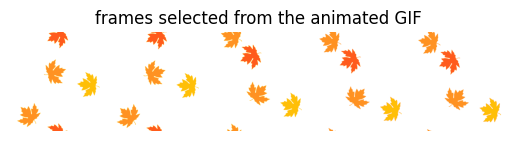

In [283]:
import imageio 
 
gif_path = 'images/leaves.gif' 
 
np.random.seed(3) 
images = [] 
with imageio.get_reader(gif_path) as reader: 
    for i, frame in enumerate(reader): 
        if len(images) < 5: 
            if np.random.rand() > 0.75: 
                images.append(frame) 
                print(f"Frame {i + 1} shape: {frame.shape}") 
plt.imshow(np.hstack(images)), plt.axis('off') 
plt.title('frames selected from the animated GIF', size=12) 
plt.show() 

In [ ]:
from glob import glob

# read frames for the animation
frames = [imageio.imread(f) for f in glob('images/world/*.png')]

# Save frames as an animated GIF
with imageio.get_writer('images/world.gif', duration=0.1) as writer:
    for frame in frames:
        writer.append_data(frame)

## Displaying image / video with Jupyter (IPython)

In [ ]:
from IPython.display import Image 
# Display an image file inline 
Image(filename="images/monalisa.jpg")

In [ ]:
from IPython.display import display 
from PIL import Image
# Open an image using PIL 
img = Image.open("images/monalisa.jpg")
# Display inline in Jupyter 
display(img)

In [ ]:
from IPython.display import Video
Video('./images/football.mp4', embed=True, width=640, height=360)

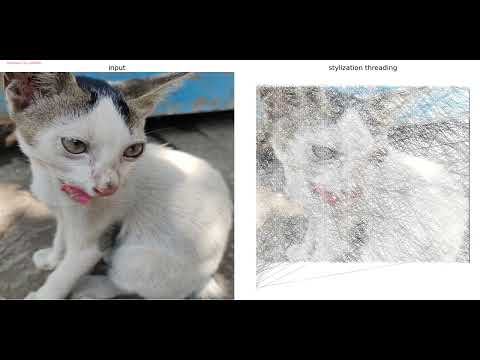

In [4]:
from IPython.display import YouTubeVideo
display(YouTubeVideo('VydHkSwS6F4'))

In [9]:
im = Image.open("images/parrot.png")
print(im.mode)
# RGB
im.save("images/parrot.jpg")
#im = Image.open("images/parrot.jpg")
#im2.show()

RGB


But if the PNG file is of RGBA mode, we need to convert it to RGB mode before we save the
as JPG, otherwise it will give an error. The next code blog shows how to first convert and
then save.

In [10]:
im = Image.open("images/hill_alpha.png")
print(im.mode)
# RGBA
im.convert('RGB').save("images/hill.jpg") # first convert to RGB mode
#im = Image.open("images/hill.jpg")
#im.show()

RGBA


### Image Types (modes)

An image can be of following different types:

* Single channel images (each pixel is represented by a single value) 
    - Binary (monochrome) image (each pixel is represented by a single 0-1 bit) 
    - Gray-level image (each pixel can be represented with 8-bits and can have value typically in the range 0-255)
* Multi-channel images (each pixel is represented by a tuple of values) 
    - 3-channel images, e.g., 
        * RGB images - each pixel is represented by a 3-tuple (r,g,b) values, representing red, green and blue
channel color values for every pixel.
        * HSV images - each pixel is represented by a 3-tuple (h,s,v) values, representing hue (color), saturation
(colorfulness: how much the color is mixed with white) and value (brightnessL how much the color is
mixed with black) channel color values for every pixel. The HSV model describes colors in a similar
manner as the human eye tends to perceive colors. 
    - 4-channel images (e.g., RGBA images - each pixel is represented by a 3-tuple (r,g,b,α) values, the last channel representing the
transparency).

### Converting from one image mode to another

We have seen how we can use the `convert()` method from `PIL.Image` to convert a RGB color image to grayscale. Let's now see how we can do it with `scikit-image`. We can convert an RGB image to a gray-scale image while reading the image itself. The following code exactly does that using `skimage.imread()` function by setting the parameter `as_gray` to value `True`. As you can see, the image is 2 dimensional now and it no logner has the color channel.

In [11]:
im = imread("images/parrot.png", as_gray=True)
print(im.shape)
#(362L, 486L)

(340, 453)


Note that we can lose some information while converting to gray scale for some colored images, the following
code shows such an example with the Ishihara plates, used to detect color-blindness. This time the function
`rgb2gray()` is used from the color module and both the color and the gray-scale images are shown side by
side. As can be seen, the letter 8 is almost not visible in the gray-scale version. The next figure shows the output of the code snippet, the colored image and gray-scale image obtained from it.

In [ ]:
im = imread("images/ishihara.jpeg")
im_g = color.rgb2gray(im)
print(im.shape, im_g.shape)
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(im, cmap='gray'), plt.axis('off')
plt.subplot(122), plt.imshow(im_g, cmap='gray'), plt.axis('off')
plt.show()

In [ ]:
def colorize(im, hue, saturation=1):     
    hsv = color.rgb2hsv(im) 
    hsv[:, :, 1] = saturation 
    hsv[:, :, 0] = hue 
    return color.hsv2rgb(hsv) 

from skimage.color import rgba2rgb
im = rgba2rgb(imread('images/model.png'))
hue_rotations = np.linspace(0, 1, 6) 
fig, axes = plt.subplots(nrows=1, ncols=7, sharex=True, sharey=True, \
                                                       figsize=(15,4)) 
axes[0].imshow(im), axes[0].set_axis_off() 
axes[0].set_title('grayscale', size=15) 
for ax, hue in zip(axes.flat[1:], hue_rotations): 
    tinted_im = colorize(im, hue, saturation=0.3) 
    ax.imshow(tinted_im, vmin=0, vmax=1) 
    ax.set_axis_off() 
fig.tight_layout() 

In [ ]:
import numpy as np 
import matplotlib.pylab as plt 
 
lena = plt.imread("images/monalisa.jpg") # read image from disk as numpy ndarray 
lx, ly = lena.shape[:2] 
 
cropped_lena = lena[120:210, 160:220, :]  # crop a region 
X, Y = np.ogrid[0:lx, 0:ly] 
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4 
masked_lena = lena.copy() 
masked_lena[mask,:] = 0 # masks 
 
plt.figure(figsize=(12,5)) 
plt.subplot(131), plt.imshow(lena, aspect='auto'), plt.axis('off'), plt.title('original', size=15) 
plt.subplot(132), plt.imshow(cropped_lena, aspect='auto'), plt.axis('off'), plt.title('cropped', size=15) 
plt.subplot(133), plt.imshow(masked_lena, aspect='auto'), plt.axis('off'), plt.title('masked', size=15) 
plt.tight_layout() 
plt.show() 

In [ ]:
v_flipped_lena = np.flipud(lena)  # Vertical flip 
h_flipped_lena = np.fliplr(lena)  # horizontal flip 
vh_flipped_lena = np.fliplr(v_flipped_lena) #both Vertical & horizontal flip 
plt.imshow(np.hstack((lena, v_flipped_lena, h_flipped_lena,  \
                                            vh_flipped_lena))) 
plt.axis('off') 
plt.show() 

In [ ]:
from skimage.transform import SimilarityTransform 

def plot_image(im, title='', fontsize=20): 
     plt.imshow(im), plt.axis('off'), plt.title(title, size=fontsize) 
         
def plot_images(images, titles, suptitle='', fontsize=20, \
                                supfontsize=22, figsize=(15,7)): 
    n = len(images) 
    plt.figure(figsize=figsize) 
    plt.gray() 
    for i in range(n): 
        plt.subplot(1,n,i+1), plot_image(images[i], titles[i], fontsize) 
    plt.suptitle(suptitle, size=supfontsize) 
    plt.tight_layout() 
    plt.show()

im = plt.imread('images/monalisa.jpg')


from skimage.transform import warp 
 
def translate(xy, t_x, t_y): 
    xy[:, 0] -= t_x 
    xy[:, 1] -= t_y 
    return xy 
 
im = imread('images/monalisa.jpg') 
im_trans = warp(im, translate, map_args={'t_x':-100, 't_y':50}, order=1) # create a dictionary for translation parameters 

def rotate(xy, theta): 
    theta = np.deg2rad(theta) #np.pi/180*theta # in radian 
    xy[:, 0], xy[:, 1] = xy[:, 0]*np.cos(theta) - xy[:,1]*np.sin(theta),   \
                         xy[:, 0]*np.sin(theta) + xy[:,1]*np.cos(theta) 
    return xy 
 
# create a dictionary for rotation parameters 
im_rot = warp(im, rotate, map_args={'theta':10})  

t_x, t_y = im.shape[0]/2, -100 
print(t_x, t_y) 
tform = SimilarityTransform(scale=0.9, rotation=np.pi/4,  
                            translation=(t_x, t_y)) 
im_sim = warp(im, tform.inverse) 
plt.imsave('images/monalisa_sim.jpg', im_sim) # save the transformed image 
 
# Get the transformation matrix 
matrix_sim = tform.params 
print(matrix_sim) 

im_tformed = imread('images/monalisa_sim.jpg') 
tform = AffineTransform(np.linalg.inv(matrix_sim)) 
im_recon_affine = warp(im_tformed, tform.inverse) 
matrix_affine = tform.params 
print(matrix_affine) 

plot_images([im, im_tformed, im_recon_affine],\
            ['original', 'transformed with SimilarityTransform', \
             'Reonstructed with AffineTransform'],\
            'Reconstructing image with affine transform', \
            fontsize=10, supfontsize=15, figsize=(8,5)) 

In [ ]:
from skimage.transform import swirl 
 
im_swirled = swirl(im, rotation=0, strength=5, radius=300) 
 
plot_images([im_trans, im_rot, im_sim, im_swirled], \
   ['transalation', 'rotation', 'similarity transform', 'swirl transform'],\
   'geometric transformation with warp()', fontsize=10, supfontsize=15, figsize=(12,5))

In [ ]:
im = imread('images/monalisa.jpg', True) 
x,y = np.meshgrid(np.float32(np.arange(im.shape[1])), \
      np.float32(np.arange(im.shape[0]))) 
y = y + 20*np.sin(x/15) 
distorted = ndimage.map_coordinates(im, [y.ravel(),x.ravel()]) 
plt.imshow(distorted.reshape(im.shape)), plt.axis('off') 
plt.show()

### Apply Sepia Color Filter 

In [ ]:
def sepia_filter_PIL(image_path):
    img = Image.open(image_path)
    width, height = img.size
    pixels = img.load() # create the pixel map
    for py in range(height):
        for px in range(width):
            r, g, b = img.getpixel((px, py))
            pixels[px, py] = (min(255, int(0.393*r + 0.769*g + 0.189*b)), \
                              min(255, int(0.349*r + 0.686*g + 0.168*b)), \
                             min(255, int(0.272*r + 0.534*g + 0.131*b)))
    return img

def sepia_filter_np(image_path):
    im = plt.imread(image_path)
    im = im / im.max() 
    R, G, B = im[...,0], im[...,1], im[...,2]
    im_out = np.dstack((0.393 * R + 0.769 * G + 0.189 * B, \
    0.349 * R + 0.686 * G + 0.168 * B, \
    0.272 * R + 0.534 * G + 0.131 * B))
    im_out = np.clip(im_out, 0, 1)
    return (255*im_out).astype(np.uint8)

img_path = 'images/sea_beach.jpg'
start = time()
im_out_np = sepia_filter_np(img_path) 
print('time (np): {:03f} sec'.format(time() - start))
start = time()
im_out_PIL = sepia_filter_PIL(img_path) 
print('time (PIL): {:03f} sec'.format(time() - start))
im, im_out_PIL = plt.imread(img_path), np.array(im_out_PIL)
plt.figure(figsize=(20,7))
plt.imshow(np.hstack((im, im_out_np, im_out_PIL))), plt.axis('off')
plt.show()

### with gradio

In [5]:
import numpy as np 
import gradio as gr 
 
def sepia(input_img): 
    sepia_filter = np.array([ 
        [0.393, 0.769, 0.189],  
        [0.349, 0.686, 0.168],  
        [0.272, 0.534, 0.131]]) 
    sepia_img = input_img.dot(sepia_filter.T) 
    sepia_img /= sepia_img.max() 
    return sepia_img 
 
iface = gr.Interface(sepia, gr.Image(), "image") 
iface.launch() 

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


### Demonstrating Sepia color filtering with Gradio Interface

![](images/app_scr_cap.gif)

### Adding alpha channel / transparency to a png image

RGB


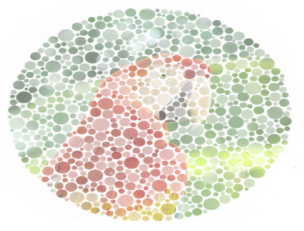

In [77]:
im = Image.open('images/parrot.png')
print(im.mode)
im = im.convert('RGBA')
im_alpha = ImageOps.invert(Image.open("images/Ishihara.png").convert('L'))
im.putalpha(im_alpha.resize((im.width, im.height)))
im.save('images/parrot_alpha.png')
plt.imshow(im), plt.axis('off')
plt.show()

## Data Types

### Inspecting Data Type of an Image

In [27]:
from skimage.io import imread
import numpy as np

image = imread('images/parrot.png')  # Automatically returns uint8
print("Image dtype:", image.dtype)
print("Pixel range:", image.min(), "to", image.max())

Image dtype: uint8
Pixel range: 0 to 255


### Converting Between Data Types

In [28]:
# Normalize image to float [0, 1]
image_float = image.astype(np.float32) / 255.0
print("Float dtype:", image_float.dtype)
print("New range:", image_float.min(), "to", image_float.max())

Float dtype: float32
New range: 0.0 to 1.0


### ⚠️ Caution: Overflow and Clipping
When operating on uint8 images, be careful with arithmetic operations:

In [29]:
#bright = image + 100  # WRONG: causes overflow if dtype is uint8
bright = np.clip(image.astype(np.int16) + 100, 0, 255).astype(np.uint8)

image_float = image.astype(np.float32) / 255.0
bright_float = np.clip(image_float + 0.4, 0.0, 1.0)

### Binary Masks with Boolean Images

In [30]:
from skimage.color import rgb2gray

gray = rgb2gray(image)  # Returns float image [0, 1]
mask = gray > 0.5       # Boolean mask
print("Mask dtype:", mask.dtype)  # Output: bool

Mask dtype: bool


### Color Gamut

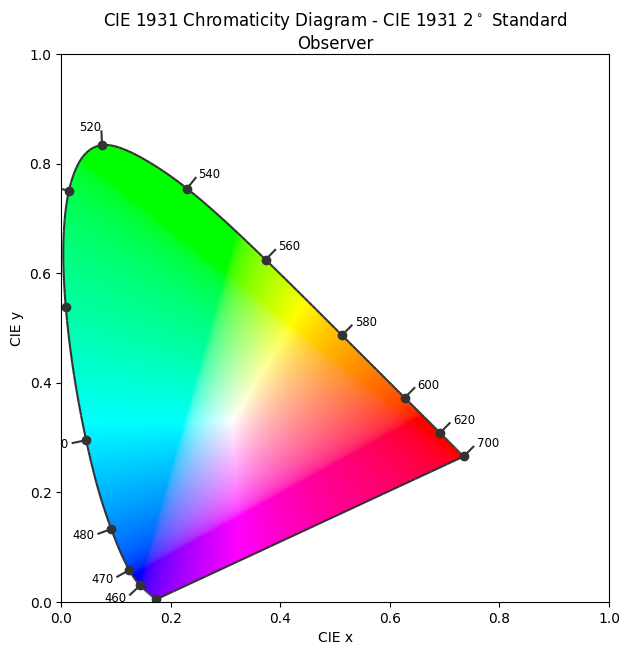

In [3]:
# pip install colour-science 
from colour.plotting import plot_chromaticity_diagram_CIE1931 
import matplotlib.pylab as plt
plot_chromaticity_diagram_CIE1931() 
plt.show() 

## Color spaces

The following represents a few popular channels / color spaces for an image.

* RGB
* HSV
* XYZ
* YUV
* YIQ
* YPbPr
* YCbCr
* YDbDr

We can use affine mappings to go from one color-space to another. The following matrix
represent the linear mapping from RGB to YIQ color space.

![](images/rgb_yiq.png)

### Converting from one color space to another

We can convert from one color space to another using library functions, for example, the
following code converts an RGB color space to HSV color space image. The next figure shows the parrot HSV image, created using the code.

In [ ]:
im = imread("images/parrot.png")
im_hsv = color.rgb2hsv(im)
plt.figure(figsize=(15,6))
plt.gray()
plt.subplot(131), plt.axis('off'), plt.title('hue', size=20), plt.imshow(im_hsv[...,0], cmap='Reds')
plt.subplot(132), plt.axis('off'), plt.title('saturation', size=20), plt.imshow(im_hsv[...,1])
plt.subplot(133), plt.axis('off'), plt.title('value', size=20), plt.imshow(im_hsv[...,2])
plt.tight_layout()
plt.show()
#show()

Similarly, we can convert the image to YUV color-space using the following code.

In [229]:
im_yuv = color.rgb2yuv(im)
imsave('images/parrot_yuv.png', (255*im_yuv).astype(np.uint8))

### Color Enhancement in HSV colorspace

Let's now change the hue, saturation and value channels in the HSV colorspace represetation of an image (e.g, multiply the corresponding channel values by a factor with the function `multiply_channel_hsv()` and clipping values above $1$ to $1$) using the following code snippet. Obesrve how the color of the image is enhanced when the saturation and value channels are increased, respectively. We need to convert the RGB image to HSV, modify one of the channels and convert in back to RGB. 

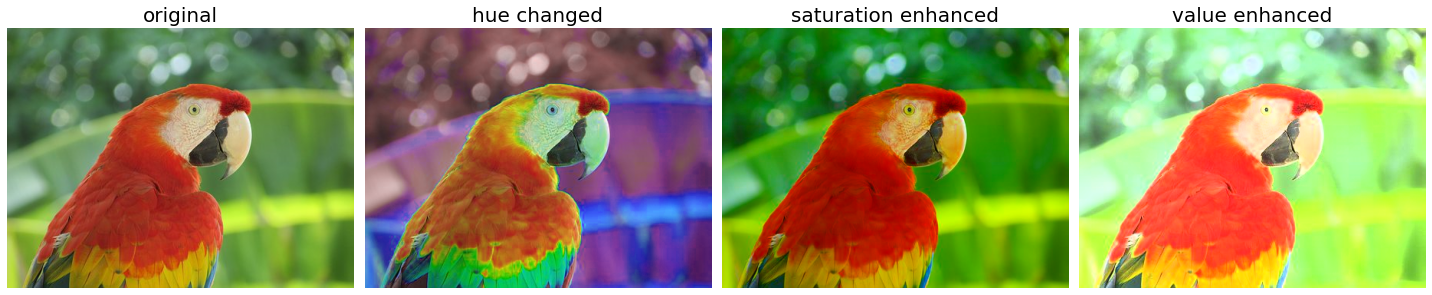

In [48]:
def multiply_channel_hsv(im, i, f):
    im_hsv = color.rgb2hsv(im)
    im_hsv[...,i] = np.minimum(f*im_hsv[...,i], 1)
    return color.hsv2rgb(im_hsv)

im = imread('images/parrot.png')
plt.figure(figsize=(20,7))
plt.subplot(141), plt.axis('off'), plt.title('original', size=20), plt.imshow(im)
plt.subplot(142), plt.axis('off'), plt.title('hue changed', size=20), plt.imshow(multiply_channel_hsv(im, 0, 3))
plt.subplot(143), plt.axis('off'), plt.title('saturation enhanced', size=20), plt.imshow(multiply_channel_hsv(im, 1, 2.5))
plt.subplot(144), plt.axis('off'), plt.title('value enhanced', size=20), plt.imshow(multiply_channel_hsv(im, 2, 2))
plt.tight_layout()
plt.show()

### Tinting gray-scale images in HSV colorspace

#### Displaying the Hue Gradient

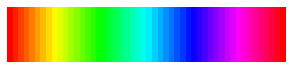

In [55]:
hue_gradient = np.linspace(0, 1)
hsv = np.ones(shape=(1, len(hue_gradient), 3), dtype=float)
hsv[:, :, 0] = hue_gradient
all_hues = color.hsv2rgb(hsv)

fig, ax = plt.subplots(figsize=(5, 2))
# Set image extent so hues go from 0 to 1 and the image is a nice aspect ratio.
ax.imshow(all_hues, extent=(0 - 0.5 / len(hue_gradient),
                            1 + 0.5 / len(hue_gradient), 0, 0.2))
ax.set_axis_off()

#### Colorize a grayscale image with Vintage look

In [ ]:
def colorize(im, hue, saturation=1):
    """ Add color of the given hue to an RGB im.

    By default, set the saturation to 1 so that the colors pop!
    """
    hsv = color.rgb2hsv(im)
    hsv[:, :, 1] = saturation
    hsv[:, :, 0] = hue
    return color.hsv2rgb(hsv)

im = imread('images/man.jpg')
hue_rotations = np.linspace(0, 1, 6)
fig, axes = plt.subplots(nrows=1, ncols=7, sharex=True, sharey=True, figsize=(15,4))
axes[0].imshow(im), axes[0].set_axis_off(), axes[0].set_title('grayscale', size=15)
for ax, hue in zip(axes.flat[1:], hue_rotations):
    # Turn down the saturation to give it that vintage look.
    tinted_im = colorize(im, hue, saturation=0.3)
    ax.imshow(tinted_im, vmin=0, vmax=1)
    ax.set_axis_off()
fig.tight_layout()

### Implementing Color Pop Effect with Hue filtering and Saturation Modfication

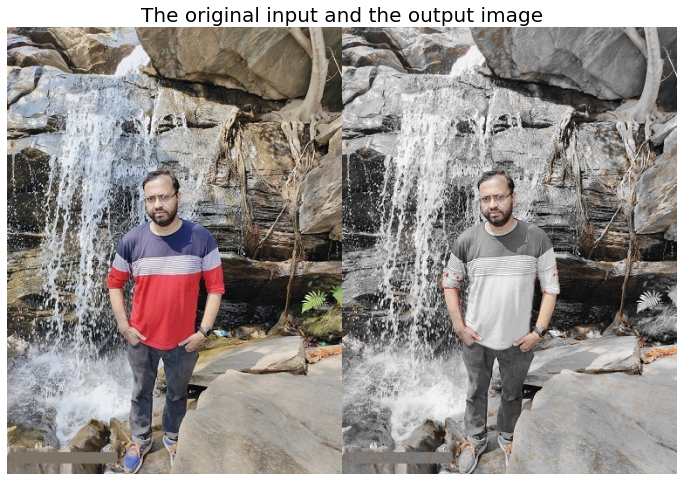

In [234]:
im = imread('images/me.jpg')
im = im / im.max()
im_hsv = color.rgb2hsv(im)
im_hsv[im_hsv[...,0] > 0.09,1] = 0
im_out = color.hsv2rgb(im_hsv)
plt.figure(figsize=(12,12))
plt.imshow(np.hstack((im,im_out))), plt.axis('off')
plt.title('The original input and the output image', size=20)
plt.show()

### Color Enhancement in RGB Colorspace

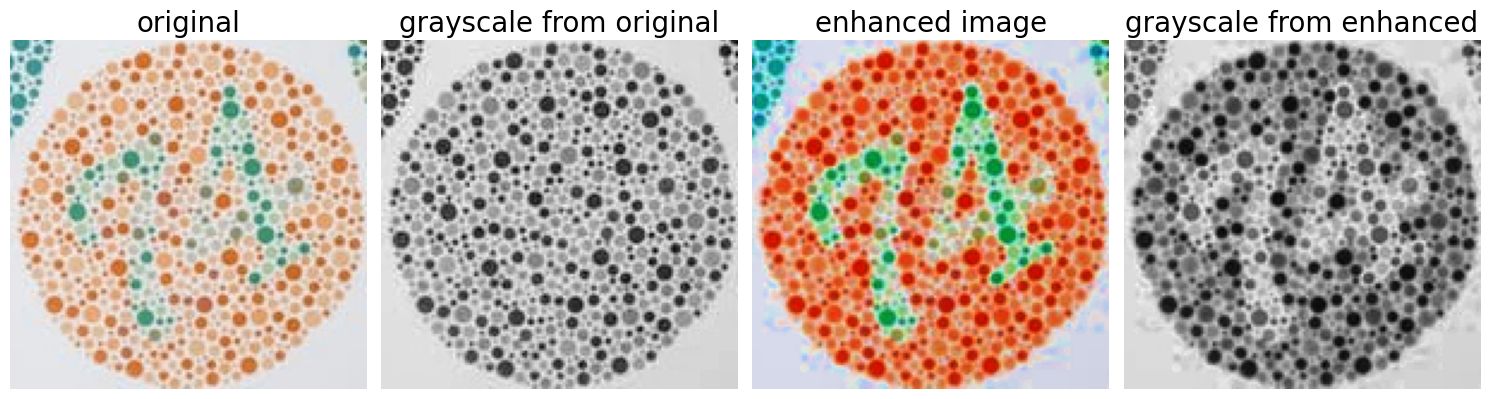

In [22]:
def enhance_rgb(im, f=4):
    im = im.copy()
    r, g, b = im[...,0], im[...,1], im[...,2]
    m = np.maximum(np.maximum(r, g), b)
    im[...,0], im[...,1], im[...,2] = (r/m)**f*m, (g/m)**f*m, (b/m)**f*m
    return im

im = imread('images/ishihara2.png')[...,:3]
im_en = enhance_rgb(im)
plt.figure(figsize=(15,5))
plt.gray()
plt.subplot(141), plt.axis('off'), plt.title('original', size=20), plt.imshow(im)
plt.subplot(142), plt.axis('off'), plt.title('grayscale from original', size=20), plt.imshow(color.rgb2gray(im))
plt.subplot(143), plt.axis('off'), plt.title('enhanced image', size=20), plt.imshow(im_en)
plt.subplot(144), plt.axis('off'), plt.title('grayscale from enhanced', size=20), plt.imshow(color.rgb2gray(im_en))
plt.tight_layout()
plt.show()

### Color Shifting in CIELab colorspace

Now let's change the luminosity and the color (a, b) channels in the **Lab** colorspace represetation of an image (e.g, add the corresponding channel values by a given shift value $x$ with the function `add_channel_lab()`) using the following code snippet. Obesrve how the color of the image is shifted when the **a** channel values are increased by $10$ (resulting in a *red-tinted* image) and **b** channel values are decreased by $25$ (resulting in a *cooled* image), respectively. When the **L** channel values are increased, the brightness of the image increases instead, as can be seen from the next figure. We need to convert the RGB image to LAB, 0modify one of the channels and convert in back to RGB.

In [ ]:
def add_channel_lab(im, i, x):
    im_lab = color.rgb2lab(im)
    im_lab[...,i] = x + im_lab[...,i]
    return color.lab2rgb(im_lab)

im = imread('images/scene.jpg')
plt.figure(figsize=(15,5))
plt.subplot(141), plt.axis('off'), plt.title('original', size=20), plt.imshow(im)
plt.subplot(142), plt.axis('off'), plt.title('luminosity changed', size=20), plt.imshow(add_channel_lab(im, 0, 50))
plt.subplot(143), plt.axis('off'), plt.title('red tinted', size=20), plt.imshow(add_channel_lab(im, 1, 10))
plt.subplot(144), plt.axis('off'), plt.title('cooled', size=20), plt.imshow(add_channel_lab(im, 2, -25))
plt.tight_layout()
plt.show()

### Skin color detection with HSV and YCbCr Colorspace

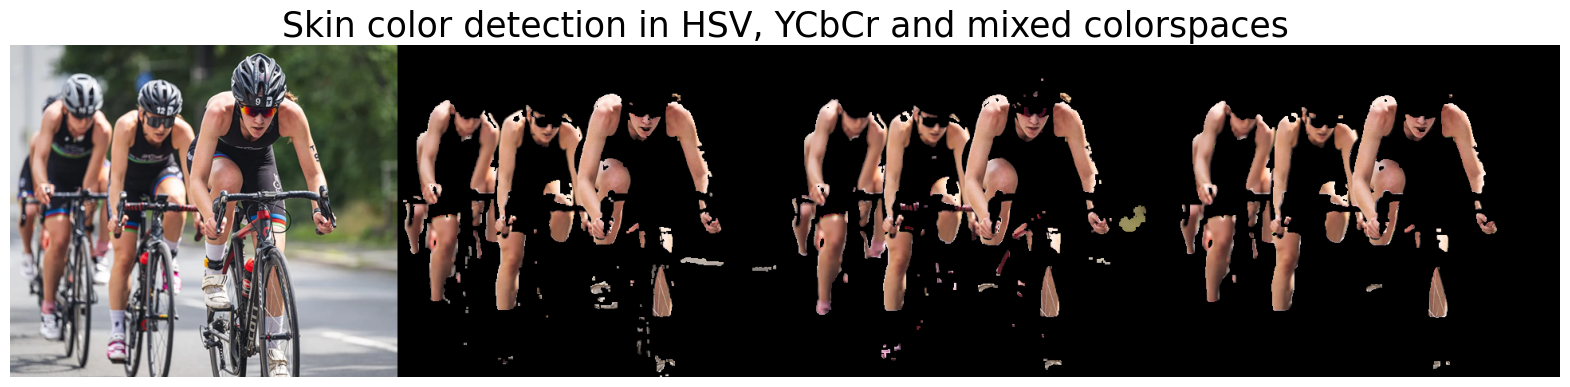

In [8]:
# Constants for HSV and YCrCb skin detection thresholds
HSV_LOWER = (0, 15, 0)
HSV_UPPER = (17, 170, 255)
YCrCb_LOWER = (0, 135, 85)
YCrCb_UPPER = (255, 180, 135)

#def detect_skin_color(img): 
def detect_skin_color(img: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Detects human skin regions in an image using HSV and YCrCb color space thresholds.

    Args:
        img (np.ndarray): Input BGR image (as loaded by OpenCV).

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
            A tuple of RGB images showing:
            - Original image
            - Skin regions detected via HSV
            - Skin regions detected via YCrCb
            - Combined mask of both methods
    """
    #converting from gbr to hsv color space 
    img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    #skin color range for hsv color space  
    HSV_mask = cv2.inRange(img_HSV, HSV_LOWER, HSV_UPPER)
    HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8)) 
    #converting from gbr to YCbCr color space 
    img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) 
    YCrCb_mask = cv2.inRange(img_YCrCb, YCrCb_LOWER, YCrCb_UPPER)
    # skin color range for YCbCr color space  
    YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8)) 
    # merge skin detection (YCbCr and hsv) 
    global_mask = np.bitwise_and(YCrCb_mask,HSV_mask) 
    global_mask = cv2.medianBlur(global_mask,3) 
    global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8)) 
 
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    out_HSV = cv2.cvtColor(img & color.gray2rgb(HSV_mask),  \
                                           cv2.COLOR_BGR2RGB) 
    out_YCrCb = cv2.cvtColor(img & color.gray2rgb(YCrCb_mask), \
                             cv2.COLOR_BGR2RGB) 
    out_global = cv2.cvtColor(img & color.gray2rgb(global_mask), \
                                           cv2.COLOR_BGR2RGB)  
    return img_RGB, out_HSV, out_YCrCb, out_global 
 
img = cv2.imread("images/cycling.png") 
img_RGB, out_HSV, out_YCrCb, out_global = detect_skin_color(img) 
 
plt.figure(figsize=(20,7)) 
plt.imshow(np.hstack((img_RGB, out_HSV, out_YCrCb, out_global))), plt.axis('off') 
plt.title('Skin color detection in HSV, YCbCr and mixed colorspaces',  
                                                             size=25) 
plt.show()  

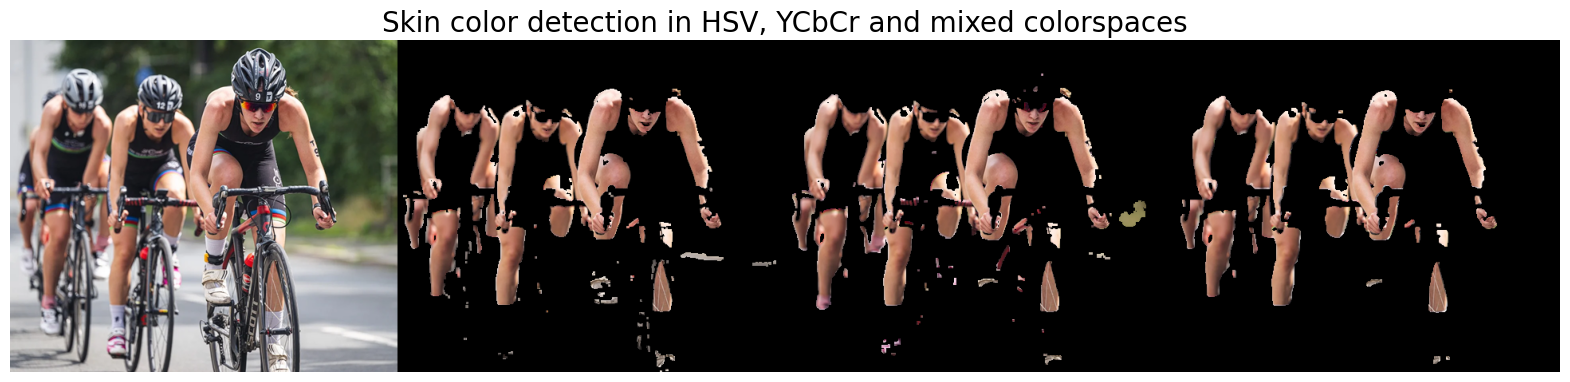

In [161]:
#Open a simple image
img = cv2.imread("images/cycling.png")

#converting from gbr to hsv color space
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255)) #skin color range for hsv color space 
HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135)) #skin color range for YCbCr color space 
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#merge skin detection (YCbCr and hsv)
global_mask = np.bitwise_and(YCrCb_mask,HSV_mask)
global_mask = cv2.medianBlur(global_mask,3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))

img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
out_HSV = cv2.cvtColor(img & color.gray2rgb(HSV_mask), cv2.COLOR_BGR2RGB)
out_YCrCb = cv2.cvtColor(img & color.gray2rgb(YCrCb_mask), cv2.COLOR_BGR2RGB)
out_global = cv2.cvtColor(img & color.gray2rgb(global_mask), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,7))
plt.imshow(np.hstack((img_RGB, out_HSV, out_YCrCb, out_global))), plt.axis('off')
plt.title('Skin color detection in HSV, YCbCr and mixed colorspaces', size=20)
plt.show()

### Data structures to store images

As we have already discussed, `PIL` uses Image object to store an image, whereas `scikit-image` uses `numpy`
ndarray data structure to store the image data. The next section describes how to convert between these two
data structures.

### Converting the image data structures

The following code block shows how to convert from `PIL` Image object to a `numpy` ndarray
(to be consumed by scikit-image).

In [ ]:
im = Image.open('images/flowers.jpg') # read image into an Image object with PIL
im = np.array(im) # create a numpy ndarray from the Image object
plt.figure(figsize=(10,5))
plt.imshow(im) # use skimage imshow to display the image
plt.axis('off')
plt.show()

The following code block shows how to convert from `numpy` ndarray to a `PIL` Image object.
When run, the code shows the same output as the above figure.

In [ ]:
im = imread('images/flowers.png') # read image into numpy ndarray with skimage
im = Image.fromarray(im) # create a PIL Image object from the numpy ndarray
#im.show() # display the image with PIL Image.show() method

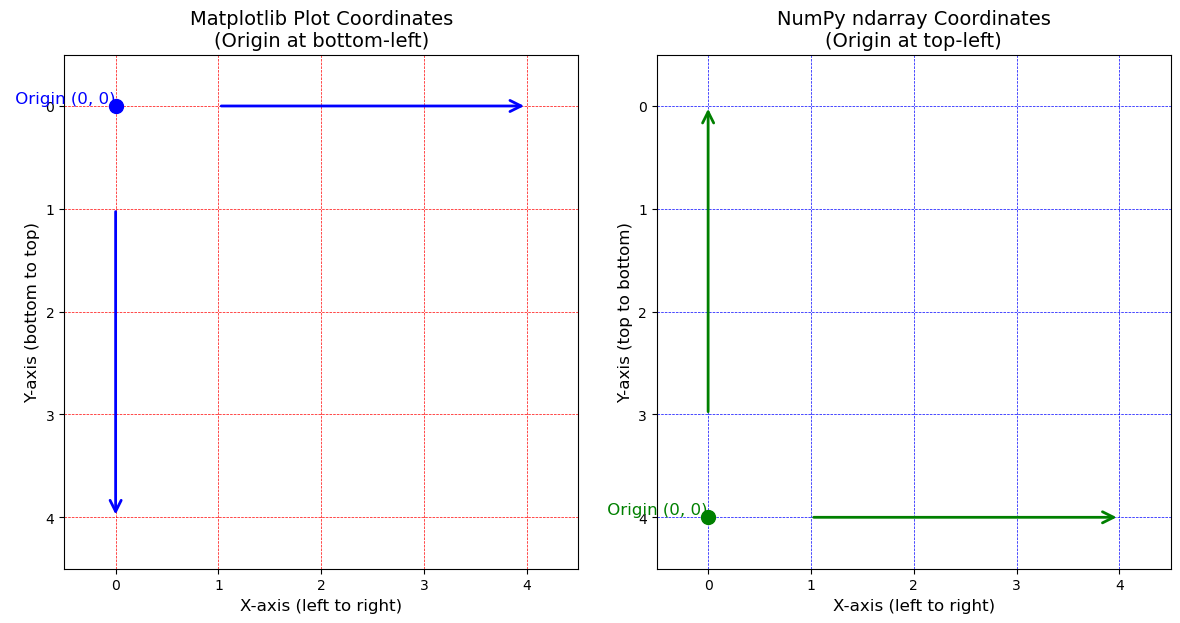

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Create a sample image array
image_array = (255*np.ones((5, 5))).astype(np.uint8)

# Plot using Matplotlib with default coordinates
plt.figure(figsize=(12, 6))

# Subplot 1: Matplotlib coordinates
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray_r', origin='upper')
plt.title('Matplotlib Plot Coordinates\n(Origin at bottom-left)', fontsize=14)
plt.xlabel('X-axis (left to right)', fontsize=12)
plt.ylabel('Y-axis (bottom to top)', fontsize=12)
plt.grid(True, which='both', color='red', linestyle='--', linewidth=0.5)

# Add x and y axis arrows for Matplotlib coordinates
plt.annotate('', xy=(4, 0), xytext=(1, 0), arrowprops=dict(arrowstyle="->", color='blue', linewidth=2, mutation_scale=20))
plt.annotate('', xy=(0, 4), xytext=(0, 1), arrowprops=dict(arrowstyle="->", color='blue', linewidth=2, mutation_scale=20))

# Mark the origin (0, 0) in Matplotlib coordinates
plt.scatter([0], [0], color='blue', s=100, zorder=5)
plt.text(0, 0, ' Origin (0, 0)', fontsize=12, verticalalignment='bottom', horizontalalignment='right', color='blue')

# Subplot 2: NumPy coordinates
plt.subplot(1, 2, 2)
plt.imshow(image_array, cmap='gray_r', origin='upper')
plt.title('NumPy ndarray Coordinates\n(Origin at top-left)', fontsize=14)
plt.xlabel('X-axis (left to right)', fontsize=12)
plt.ylabel('Y-axis (top to bottom)', fontsize=12)
plt.grid(True, which='both', color='blue', linestyle='--', linewidth=0.5)

# Add x and y axis arrows for NumPy coordinates
plt.annotate('', xy=(4, 4), xytext=(1, 4), arrowprops=dict(arrowstyle="->", color='green', linewidth=2, mutation_scale=20))
plt.annotate('', xy=(0, 0), xytext=(0, 3), arrowprops=dict(arrowstyle="->", color='green', linewidth=2, mutation_scale=20))

# Mark the origin (0, 0) in NumPy coordinates
plt.scatter([0], [4], color='green', s=100, zorder=5)
plt.text(0, 4, ' Origin (0, 0)', fontsize=12, verticalalignment='bottom', horizontalalignment='right', color='green')

plt.tight_layout()
plt.show()

## Image Manipulations with numpy 


### with array slicing

The next code block shows how slicing and masking with numpy arrays can be used to create
a circular mask on the lena image.

In [ ]:
lena = mpimg.imread("images/monalisa.jpg") # read the image from disk as a numpy ndarray
lx, ly = lena.shape[:2]
print(lena[0, 40])
#print(lena[10:13, 20:23,0:1]) # slicing
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
print(lena.flags)
lena = lena.copy()
lena[np.where(mask)] = 0 # masks
plt.figure(figsize=(5,5))
plt.imshow(lena), plt.axis('off')
plt.show()

### Simple Image Morphing: α-blending of two images using cross-dissolving

The following code block shows how to start from one face image (image1 being the face of
Messi) and end into another image (image2 being the face of Ronaldo) by using a linear
combination of the two image numpy ndarrays given by $(1-\alpha).image_1+\alpha.image_2$ and iteratively increasing α from $0$ to $1$. The next figure shows the sequence of α-blended images created using the above code, by cross-dissolving
Messi's face image into Ronaldo's. As can be seen from the sequence of intermediate images, the face
morphing with simple blending is not very smooth. In the upcoming chapters we shall see more advanced
techniques for image morphing.

In [ ]:
im1 = mpimg.imread("images/me_young.jpg")
im2 = mpimg.imread("images/me_now.jpg")
im1, im2 = im1 / im1.max(), im2 / im2.max()
i = 1
plt.figure(figsize=(12,8))
for alpha in np.linspace(0,1,18):
    plt.subplot(3,6,i), plt.imshow((1-alpha)*im1 + alpha*im2), plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

### Dividing two images to remove illumination pattern

Dividing one image by another can be used to enhance certain features of the image. Consider the following example with `np.divide()`, you can use the `cv2.divide()` function from `opencv-python` too.

In [248]:
img = cv2.imread('images/board.jpg', 0)
plt.imsave('images/board_illum_pat.png', img/img.max()*img2/img2.max())

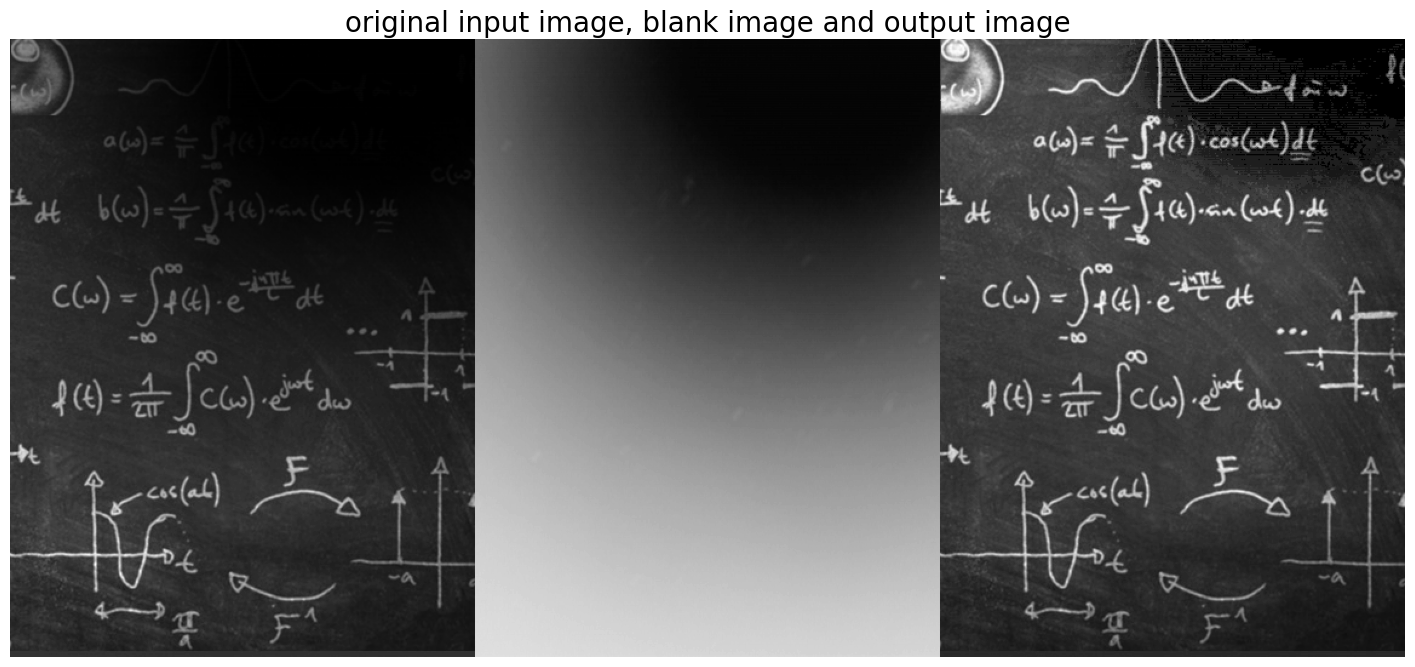

In [249]:
# Load the two images
img1 = cv2.imread('images/board_illum_pat.png', 0)
img2 = cv2.imread('images/pattern.png', 0)

# Divide the two images
out = np.divide(img1.astype(float), img2.astype(float)+0.001)
out = out / out.max()
out = (255*out).astype('uint8')

# Display the original and enhanced images
plt.figure(figsize=(18,9))
plt.gray()
plt.imshow(np.hstack((img1, img2, out))), plt.axis('off')
plt.title('original input image, blank image and output image', size=20)
plt.show()

### Applying Sepia Color Filter 

Speia toen is a brownish-yellow tint that gives an image an old-fashioned or vintage look. The following code snippets implements a function `sepia_filter()` that takes an input RGB color image (pixel value normalized between [0,1]) and applies sepia tone (filter) to the image, using `numpy` vectorized operation for each color channel. The result is a new image with a warm, vintage look, as seen in the next figure.

In [ ]:
def sepia_filter(im):
    R, G, B = im[...,0], im[...,1], im[...,2]
    im_out = im.copy() 
    im_out[...,0] = 0.393 * R + 0.769 * G + 0.189 * B
    im_out[...,1]  = 0.349 * R + 0.686 * G + 0.168 * B
    im_out[...,2]  = 0.272 * R + 0.534 * G + 0.131 * B
    im_out = np.clip(im_out, 0, 1)
    return im_out

im = imread('images/sea_beach.jpeg')
im = im / im.max()
im_out = sepia_filter(im) 
plt.figure(figsize=(12,5))
plt.imshow(np.hstack((im, im_out))), plt.axis('off')
plt.show()

time (np): 0.075505 sec
time (PIL): 1.350692 sec


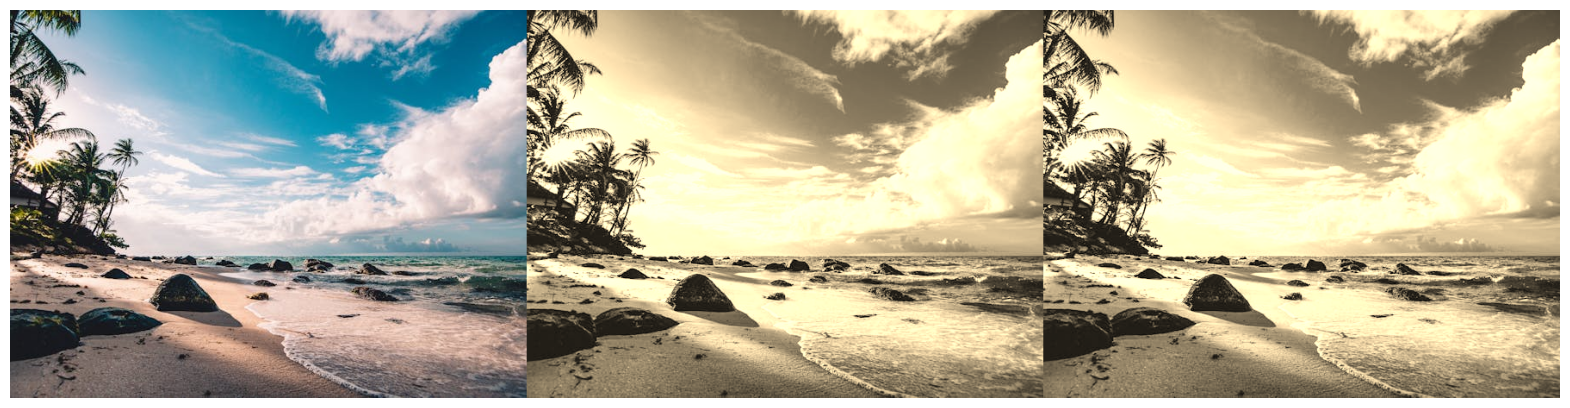

In [186]:
def sepia_filter_PIL(image_path):
    img = Image.open(image_path)
    width, height = img.size
    pixels = img.load() # create the pixel map
    for py in range(height):
        for px in range(width):
            r, g, b = img.getpixel((px, py))
            pixels[px, py] = (min(255, int(0.393 * r + 0.769 * g + 0.189 * b)), \
                              min(255, int(0.349 * r + 0.686 * g + 0.168 * b)), \
                              min(255, int(0.272 * r + 0.534 * g + 0.131 * b)))
    return img


def sepia_filter_np(image_path):
    im = plt.imread(image_path)
    im = im / im.max()    
    R, G, B = im[...,0], im[...,1], im[...,2]
    im_out = np.dstack((0.393 * R + 0.769 * G + 0.189 * B, \
                        0.349 * R + 0.686 * G + 0.168 * B, \
                        0.272 * R + 0.534 * G + 0.131 * B))
    im_out = np.clip(im_out, 0, 1)
    return (255*im_out).astype(np.uint8)

img_path = 'images/sea_beach.jpeg'
start = time()
im_out_np = sepia_filter_np(img_path) 
print('time (np): {:03f} sec'.format(time() - start))
start = time()
im_out_PIL = sepia_filter_PIL(img_path) 
print('time (PIL): {:03f} sec'.format(time() - start))
im, im_out_PIL = plt.imread(img_path), np.array(im_out_PIL)
plt.figure(figsize=(20,7))
plt.imshow(np.hstack((im, im_out_np, im_out_PIL))), plt.axis('off')
plt.show()

## Drawing Contour lines for an image

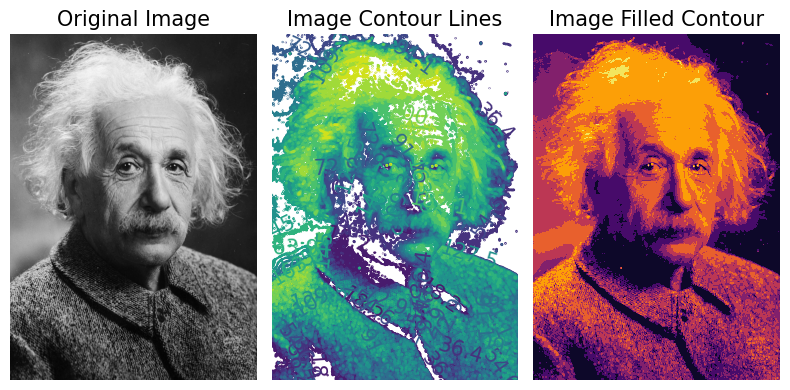

In [10]:
im = imread("images/einstein.jpg") # read image as a numpy ndarray
plt.figure(figsize=(8,4))
plt.subplot(131), plt.imshow(im, cmap='gray', aspect='auto'), 
plt.axis('off'), plt.title('Original Image', size=15)
plt.subplot(132)
cs = plt.contour(np.flipud(im), levels=np.linspace(0,255,15), camp=plt.cm.hot) 
plt.clabel(cs, fontsize=15, inline=True)
plt.axis('off')
plt.title('Image Contour Lines', size=15)
plt.subplot(133), plt.title('Image Filled Contour', size=15), 
plt.contourf(np.flipud(im), cmap='inferno'), plt.axis('off')
plt.tight_layout()
plt.show()

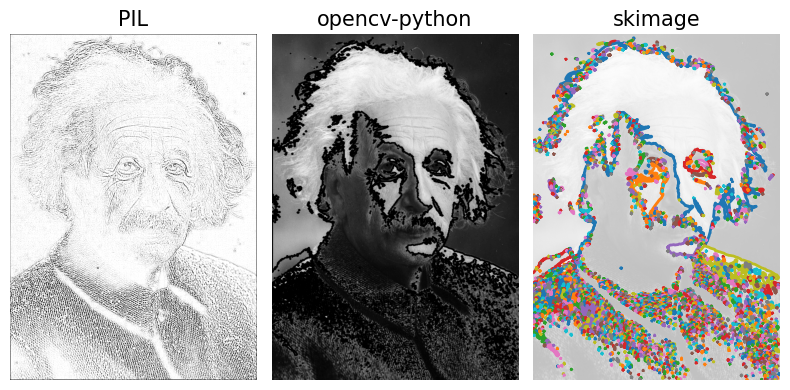

In [12]:
im = Image.open("images/einstein.jpg")
im_ctr = im.filter(ImageFilter.CONTOUR)
im = cv2.imread("images/einstein.jpg")
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(im_gray, 127, 255, 0)
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image=im_gray, contours=contours, contourIdx=-1, color=(0, 0, 0), thickness=2, lineType=cv2.LINE_AA)
im = imread("images/einstein.jpg", True) # read image as a numpy ndarray
im = im / im.max()
contours = measure.find_contours(im, 0.5) #, fully_connected="high")
plt.figure(figsize=(8,4))
plt.gray()
plt.subplot(131), plt.imshow(im_ctr, aspect='auto'), plt.axis('off') 
plt.title('PIL', size=15)
plt.subplot(132), plt.imshow(im_gray, aspect='auto'), plt.axis('off') 
plt.title('opencv-python', size=15)
plt.subplot(133), plt.imshow(im, aspect='auto', alpha=0.25), plt.axis('off') 
plt.title('skimage', size=15)
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.tight_layout()
plt.show()

## Questions

Now that you\'ve gained foundational knowledge in digital image
processing and explored key concepts and techniques, it\'s time to put
your understanding to the test with practical exercises. Let\'s dive
into hands-on problem-solving to strengthen your skills further.

**Question 1**: Apply first a translation ($t_{x} = 5$ , $t_{y} = 3$)
and then a rotation ($\theta = \frac{\pi}{6}$) transform to an image.
Show that you obtain the same transformation with a Euclidean
transformation (skimage.transform.EuclideanTransform) with the
appropriate transformation matrix. Mathematically, you have the
following geometric transformation:\
\
$T = \begin{bmatrix}
cos\theta & - sin\theta & 0 \\
sin\theta & cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}\begin{bmatrix}
1 & 0 & t_{x} \\
0 & 1 & t_{y} \\
0 & 0 & 1
\end{bmatrix} = \begin{bmatrix}
cos\theta & - sin\theta & t_{x}cos\theta - t_{y}sin\theta \\
sin\theta & cos\theta & t_{x}sin\theta + t_{y}cos\theta \\
0 & 0 & 1
\end{bmatrix}$

**Hint**

-   First, warp the input image with the translation matrix and then
    warp the output image obtained with the rotation matrix.

-   Next, warp the input image with the product of translation and
    rotation matrix.

You should obtain a figure like the following using the following input
image:

![A collage of a person\'s face AI-generated content may be
incorrect.](./images/zelda_rotate.png)\
Applying scikit-image Euclidean transform

**Question 2**: Start with the **zelda** input image (as shown below).
Implement a function `create_gif()` to create an animated GIF by rotating
the image around its center, by using `PIL.Image.save()` (use the
`append_images`, `save_all`, `duration` and the `loop` arguments to the function
`save()`. Rotate the image by the center using `skimage.warp()` or
`PIL.Image.rotate()` function). A few frames extracted from the animated
GIF are shown below.

![A person with big hair AI-generated content may be
    incorrect.](./images/zelda_anim.png)\
    **Rotating image with skimage warp**

**Hint**

In `matplotlib.pylab.imshow()` function, the `alpha` parameter controls
the transparency of the displayed image. It allows you to specify the
alpha (opacity) value for the entire image or for each pixel
individually. The alpha parameter is a scalar or a 2D array of alpha
values, where $0$ is fully transparent and $1$ is fully opaque.

As demonstrated in the next code snippet, the `alpha` parameter can be
passed to `plt.imshow()` to control the transparency, e.g., `alpha`=0.5
makes the entire image semi-transparent, allowing the underlying content
to show through.

Add **nested decorators** to the `python` function `plot_image()` defined
below, the first decorator (`remove_axis`) should remove axis ticks and
labels while plotting and the second one (`plot_gray`) will plot the image
in gray colormap, if the image is a grayscale image. Note that you can't
change the code inside `plot_image()`. Your function `plot_image()` should
use the **decorators** you implemented chained like the following:

In [ ]:
@remove_axis
@plot_gray
def plot_image(img, alpha):
    plt.imshow(img, alpha=alpha)
    plt.show()

so that you get the following outputs by calling the function with a RGB
color image (e.g., the famous Lenna image) and a 2D grayscale image,
respectively.

`plot_image(plt.imread('lena_color.jpg'), 0.4)`

**Darkening color image with decorator**

![A person wearing a hat AI-generated content may be incorrect.](./images/lena_dark.png)\


**Question 3**: **Detecting Red Cars in a Traffic Video Using HSV Color Segmentation**

Build a color-based object detection system to identify red-colored cars in a traffic video. Your goal is to extract frames from the video, segment the red regions (potentially red cars), and visualize the detection process in real-time using an animation. Your Task is to create a python program that

- Reads frames from a traffic surveillance video (e.g., cars.mp4).
- Converts each frame to the HSV color space.
- Segments out red-colored regions using appropriate hue thresholding.
- Displays an animated side-by-side view:
  - The original video frame
  - The corresponding binary red mask highlighting red cars
  - Runs the animation interactively in a Jupyter Notebook, or saves the result as a GIF or MP4.

**Hints**

- Red color appears in two ranges in HSV:
- Lower red: H in $[0, 10]$
- Upper red: H in $[160, 180]$
- Use `cv2.inRange()` to threshold the HSV image for both ranges and combine them.
- Use `cv2.morphologyEx()` with `cv2.MORPH_OPEN` and `cv2.MORPH_DILATE` to remove noise and fill gaps in red regions.
- Use `FuncAnimation` from `matplotlib.animation` to animate the results frame-by-frame.

Observe the effectiveness of hue-based segmentation for isolating red cars, how noise or lighting conditions may affect detection quality and ghe role of morphology in refining segmentation masks. role of morphology in refining segmentation masks. You should obtain an animation like the following one:

![](images/red_cars.gif)